In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from itertools import chain

vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("e_data/data'+number+'.pkl")'
    exec(new_string)

#Functions for later

def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

def flatten(some_list):
    flat_list = []
    for element in some_list:
        if type(element) is list:
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

band_channels = list(chain(range(29,35),range(46,60),range(78,96),range(102,106)))

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def single_fit(spectrum):
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectrum[band_channels],p0=[.15,-12])
    final_spectrum = spectrum-powerlaw(vims_wave,*my_fit)
    return final_spectrum

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit[1]

In [2]:
spec_list = []
for number in new_array:
    my_string = 'spec'+number+' = df'+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    spec_list.append(locals()[spec])

time_list = []
for number in new_array:
    my_string = 'ettime'+number+' = df'+number+"['ettime']"
    exec(my_string)
    time = 'ettime'+number
    time_list.append(locals()[time])

### Preliminary Cuts

In [3]:
spectrum_filter_1 = []
mean_list = []
ettime_filter_1 = []
for (df,tf) in zip(spec_list,time_list):
    for (spectrum,time) in zip(df,tf):
        fit_spec = single_fit(spectrum)
        std = np.std(fit_spec)
        ind = np.where((fit_spec>=0.5)|(fit_spec<=-0.03))
        if len(ind) == 0 or std<1:
            spectrum_filter_1.append(fit_spec)
            ettime_filter_1.append(time)

#Convert all list objects within total_list
# spectrum_array = np.asarray(spectrum_filter_1)
# time_array = np.asarray(ettime_filter_1)
print(np.shape(spectrum_filter_1))
print(np.shape(ettime_filter_1)) # Grouped by years

(12655, 256)
(12655,)


### The "flat" part of the spectrum (from 4 µm to 4.7 ish)

In [4]:
spectrum_filter_2 = []
ettime_filter_2 = []
for (spectrum,time) in zip(spectrum_filter_1,ettime_filter_1):
    std = np.std(spectrum[189:230])
    ind = np.where((spectrum[189:230]>=.005)|(spectrum[189:230]<=-0.005))

    if len(ind) ==0 or std<=.005:
        spectrum_filter_2.append(spectrum)
        ettime_filter_2.append(time)

print(np.shape(spectrum_filter_2))
print(np.shape(ettime_filter_2))

(9961, 256)
(9961,)


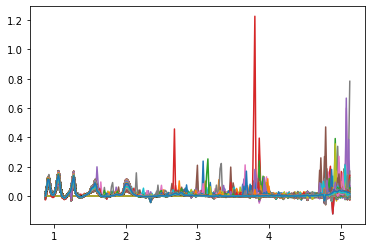

In [5]:
%matplotlib inline
plt.figure(facecolor='white')
for spectrum in spectrum_filter_2:
    plt.plot(vims_wave,spectrum)
plt.show()

In [30]:
vims_wave[189]

4.0128